# **Laboratorio bono 2**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   Nombre integrante 1
2.   Nombre integrante 2

**Número del grupo**

*Escribir el número del grupo*

# **Contexto del problema**

En el análisis de movimiento humano es importante medir fuerzas, torques y potencias, las cuales permiten evaluar el desgaste metabólico del paciente al realizar algún ejercicio y, también, diseñar de forma eficiente prótesis biónicas a partir de teoría de robótica. Calcular estas variables se logra al medir inicialmente la aceleración de un cuerpo través del análisis de video o a través del uso de acelerómetros. En el caso del análisis de video, es usual capturar primero la posición vertical y horizontal del cuerpo para eventualmene estimar la aceleración. Es fundamental tener mediciones de señales de posición que no tienen variaciones demasiado rápidas debido al ruido para realizar un análisis preciso. 



# **Descripción de la práctica**

En esta práctica se desea limpiar la señal de posición vertical y horizontal medida en un codo al abrir y cerrar una puerta, como se muestra en el siguiente esquema, de tal manera que queden listas para calcular eventualmente la aceleración:

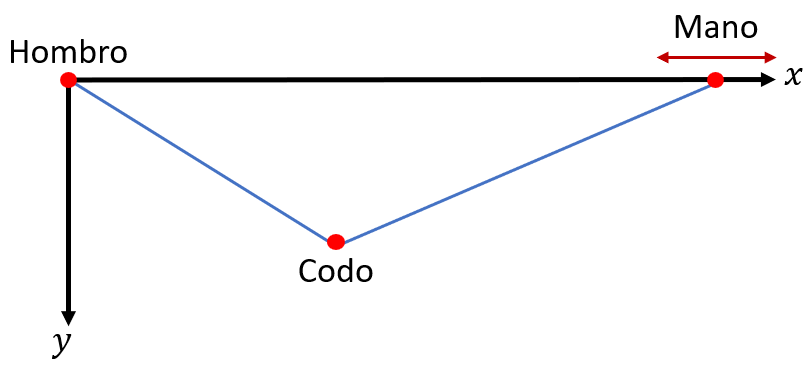

Para esto, se registró la posición tanto vertical como horizontal en el tiempo a través de la ubicación de un marcador en el codo y la grabación con el celular de una persona abriendo y cerrando la puerta manteniendo la mano a la misma altura del hombro. Estas dos variables (posición vertical y horizontal) se presentan en un archivo excel junto al arreglo asociado al tiempo. El objetivo de este laboratorio es: filtrar las señales de posición para después encontrar polinomios que mejor se ajusten a cada variable. Para esto, tenga en cuenta lo siguiente: \

**Filtrado:**

En el laboratorio anterior se implementó un filtro basado en la minimización de la energía de la derivada de una señal utilizando la matriz de derivadas $D$ definida a partir de la derivada de primer orden:

\begin{align*}
Δ_x(k) = x(k+1) - x(k)
\end{align*}

Note que los coeficientes de los términos son [1 -1] respectivamente, esta es la razón por la que la matriz $D$ posee la forma:

\begin{align*}
D = \begin{bmatrix}
1 & -1 &   &   &  \\
  & 1 & -1 &   & \\
  &   & & \ddots & \\
&  &  & 1 & -1\\
\end{bmatrix}
\end{align*}

Esta derivada de primer orden también puede ser entendida como la velocidad o tasa de cambio de la señal. Sin embargo, como se mencionó en el contexto del problema, se busca calcular aceleraciones. Un filtro más adecuado para este caso es uno basado en la energía de la aceleración, es decir, que siga la siguiente ecuación en diferencias:

\begin{align*}
Δ^2_x(k) = Δ_x(k) - Δ_x(k-1)
\end{align*}

Es decir, la matriz $D$ debe cambiar para ahora calcular la diferencia de las derivadas.

**Ajuste polinomial**
En un laboratorio anterior se ajustó una recta con respecto a datos experimentales a partir de la regresión lineal usando mínimos cuadrados. Sin embargo, en este laboratorio es necesario incrementar el grado del polinomio de la siguiente forma:
\begin{align*}
P_n(t) = \sum_{i=0}^{n} β_it^{i}
\end{align*}

Donde $n$ es el grado del polinomio, $\beta_i$ son los coeficientes del polinomio y $t$ es la variable del tiempo. 

Para llevar a cabo el objetivo, siga los siguientes pasos:



1. Defina una función que permita constuir la matriz $D$ ahora teniendo en cuenta las diferencias de las derivadas. Esta función debe recibir como parámetro el número de datos y debe retornar la matriz $D$.

2. Construya una función que permita filtrar la señal usando la función anterior para la construcción de la matriz $D$, a esta nueva función le debe entrar como parámetro la señal a filtrar y el parámetro $c$ y debe retornar la señal filtrada.

3. Teniendo en cuenta los datos en excel, filtre la posición tanto horizontal como vertical minimizando la energía de la segunda derivada (es decir, la energía de las diferencias de las derivadas). Haga un gráfico donde comparan los datos crudos y filtrados para la posición horizontal en el tiempo. El segundo gráfico es igual pero para la posición vertical. Realice este procedimiento para varios valores de $c$ e indique el que usted considere mejor. Aquí un "buen"  $c$ es tal que la señal es filtrada sin perder información importante del movimiento.

4. Filtre la señal usando la matriz de primeras derivadas y compare la sensibilidad del filtrado al parámetro $c$ con el filtrado anterior.

5. Tenga en cuenta que para filtrar la señal hay que invetir una matriz. Teniendo en cuenta la teoría de regularización, la condición de una matriz debería mejorar al regularizar el problema de minimización. Calcule la condición de la matriz que requiere ser invertida para cada uno de los valores de $c$ definidos en el punto 3. Analice el efecto de $c$ sobre la condición de la matriz.


6. Construya una función que permita construir la matriz $H$ para regresión polinómica de grado $n$. A esta función le dede entrar como parámetro los datos de la variable independiente en un conjunto de datos y el grado $n$ del polinomio de ajuste. 

7. Usando los datos filtrados anteriomente, haga una regresión polinómica donde el grado del polinomio lo debe escoger empíricamente minimizando el error cuadrático lo más que se pueda. Luego, en un gráfico, compare los datos crudos, los filtrados, y el polinomio para la posición horizontal. Realice el mismo procedimiento para la posición vertical.

8. Responda las siguientes preguntas:
 - ¿Cuál filtro fue mejor teniendo en cuenta el error cuadrático?, desde el punto de vista matemático, ¿por qué sucede esto? (use la información de la condición de una matriz)
 - ¿Cómo influyó el parámetro $c$ en el filtro teniendo en cuenta la energía tanto de primera como de segunda derivada?
 - ¿Cuál grado polinómico le dio mejores resultados?, ¿qué pasa cuando el grado es muy bajo y cuando es muy alto?
 - Teniendo en cuenta que se usaron los datos filtrados para construir la regresión, ¿qué hubiera pasado si se usaran los datos crudos?